# Clustering for dataset exploration

## Unsupervised Learning

Class of machine learning techniques for discovering patterns in data. Like clustering customers by their purchases, searching for patterns and correlations among these purchases, copressing the data using purchase patterns (dimension reduction).

Unsupervised learning is learning without labels, it is pattern discovery, unguided by a prediction task. Number of features is the dimension of the dataset.

We cant visualize 4 dimensions directly, but using unsupervised learning techniques can give insight.

KMeans remembers the mean of the sample in each cluster (centroid)
New samples are assigned to the cluster whos centroid is closest.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


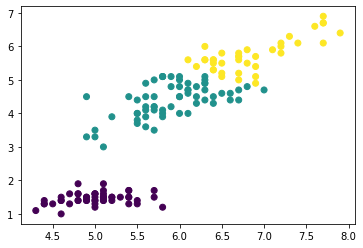

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
data = load_iris()
samples = data.data
model = KMeans(n_clusters=3)
model.fit(samples)
labels = model.predict(samples)
print(labels)
import matplotlib.pyplot as plt
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs,ys, c=labels)
plt.show()

### How many clusters?


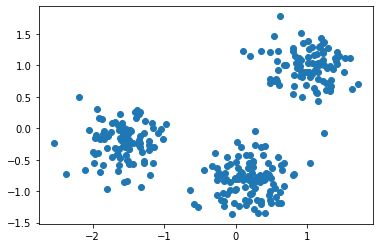

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
f = open("array.dat", "rb")
data = pickle.load(f)
f.close()
data = np.array(data)
xs = data[:,0]
ys = data[:,1]
plt.scatter(xs, ys)
plt.show()

The scatter plot suggests that there are 3 distinct clusters.



### Clustering 2D points

In [3]:
f = open("new_points.dat", "rb")
new_points = pickle.load(f)
f.close()
new_points = np.array(new_points)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(data)
labels = model.predict(new_points)
print(labels)

[2 1 0 2 1 2 1 1 1 0 2 1 1 0 0 1 0 0 1 1 0 1 2 1 2 0 1 0 0 2 2 1 1 1 0 2 1
 1 2 1 0 2 2 0 2 1 0 0 1 1 1 1 0 0 2 2 0 0 0 2 2 1 1 1 2 1 0 1 2 0 2 2 2 1
 2 0 0 2 1 0 2 0 2 1 0 1 0 2 1 1 1 2 1 1 2 0 0 0 0 2 1 2 0 0 2 2 1 2 0 0 2
 0 0 0 1 1 1 1 0 0 1 2 1 0 1 2 0 1 0 0 1 0 1 0 2 1 2 2 1 0 2 1 2 2 0 1 1 2
 0 2 0 1 2 0 0 2 0 1 1 0 1 0 0 1 1 2 1 1 0 2 0 2 2 1 2 1 1 2 2 0 2 2 2 0 1
 1 2 0 2 0 0 1 1 1 2 1 1 1 0 0 2 1 2 2 2 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0
 1 1 2 0 2 2 0 2 0 2 0 1 1 0 1 1 1 0 2 2 0 1 1 0 1 0 0 1 0 0 2 0 2 2 2 1 0
 0 0 2 1 2 0 2 0 0 1 2 2 2 0 1 1 1 2 1 0 0 1 2 2 0 2 2 0 2 1 2 0 0 0 0 1 0
 0 1 1 2]


### Inspect your clustering

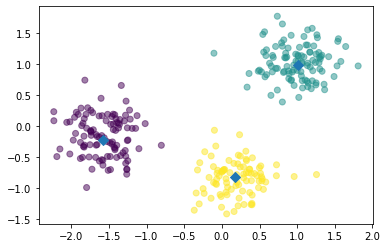

In [4]:
xs = new_points[:,0]
ys = new_points[:,1]
plt.scatter(xs, ys, c=labels, alpha=0.5)
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, marker="D", s=50)
plt.show()

But how to be sure that 3 clusters is the correct choice? In other words, how to evaluate the quality of a clustering?

## Evaluating a clustering

Measuring the clustering quality using only samples and their cluster labels. Good clustering has tight clusters. How spread out the sample within each cluster are can be measured by the "inertia". Inertia is the measure of how far sample from their centroids. Clusters that not spread out are wanted so lower values of inertia are better. KMeans tries to minimize the inertia.

A good clustering has tight clusters (low inertia) but also doesnt have too many  clusters. Choose where inertia starts to decreace more slowly.(Elbow)


### How many clusters of grain?


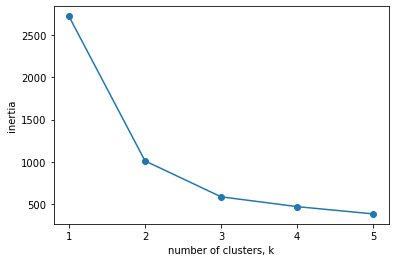

In [5]:
import pandas as pd
samples = pd.read_csv("seeds.csv", header=None)
samples_nl = samples.drop(7, axis=1)
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples_nl)
    inertias.append(model.inertia_)
plt.plot(ks, inertias, "-o")
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.



### Evaluating the grain clustering


In [6]:
varieties = samples[7].replace([1,2,3],["Kama wheat","Rosa wheat","Canadian wheat"])

model = KMeans(n_clusters=3)
labels = model.fit_predict(samples_nl)
df = pd.DataFrame({"labels":labels, "varieties":varieties})
ct = pd.crosstab(df["labels"], df["varieties"])
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       2          60          10
1                       0           1          60
2                      68           9           0


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good. 

## Transforming features for better clusterings

3 distinct varieties of wine.

In [7]:
wine = pd.read_csv("wine.csv")
wine_nl = wine.drop("class_name", axis=1)
varieties = wine["class_name"]
model = KMeans(n_clusters=3)
labels = model.fit_predict(wine_nl)

df = pd.DataFrame({"labels":labels, "varieties":varieties})
ct = pd.crosstab(df["labels"], df["varieties"])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0                0      46           1
1               19       0          50
2               29      13          20


The KMeans clusters don't correspond well with the wine varieties. The problem is that the feature of the wine dataset have very different variances. **The variance of a feature measures the spread of its values.** 

In KMeans clustering, the variance of a feature corresponds to its influence on the clustering algorithm. To give every feature a chance the data needs to be transforems so that features have equal variance.

StandatdScaler -> 0, 1


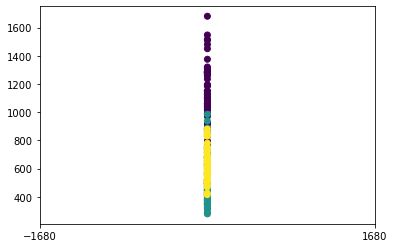

class_label                 0.600679
alcohol                     0.659062
malic_acid                  1.248015
ash                         0.075265
alcalinity_of_ash          11.152686
magnesium                 203.989335
total_phenols               0.391690
flavanoids                  0.997719
nonflavanoid_phenols        0.015489
proanthocyanins             0.327595
color_intensity             5.374449
hue                         0.052245
od280                       0.504086
proline                 99166.717355
dtype: float64


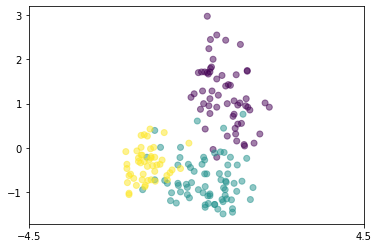

varieties  Barbera  Barolo  Grignolino
labels                                
0                0       0          68
1               48       0           1
2                0      59           2


In [8]:
varieties_color = varieties.replace(["Barolo","Grignolino","Barbera"],[0,1,2])
plt.scatter("od280", "proline", data=wine, c=varieties_color)
plt.xticks([-wine["proline"].max(),wine["proline"].max()])
plt.show()

print(wine.var())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine_nl)
StandardScaler(copy=True, with_mean=True, with_std=True)
wine_scaled = scaler.transform(wine_nl)

plt.scatter(wine_scaled[:,12], wine_scaled[:,13],c=varieties_color, alpha=0.5)
plt.xticks([-4.5, 4.5])
plt.show()

model = KMeans(n_clusters=3)
labels = model.fit_predict(wine_scaled)

df = pd.DataFrame({"labels":labels, "varieties":varieties})
ct = pd.crosstab(df["labels"], df["varieties"])
print(ct)

Standardized od280 and proline are much more informative. The models is improved with standardization. StandardScaler is an example of a "preprocessing" step. There are several of these available in scikit-learn, for example MaxAbsScaler and Normalizer.

### Scaling fish data for clustering

The measurements in the data, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, standardizing these features is needed. 

In [9]:
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler, kmeans)

### Clustering the fish data

In [10]:
df = pd.read_csv("fish.csv", header=None)
samples = df.drop(0, axis=1)
pipeline.fit(samples)
labels = pipeline.predict(samples)
df = pd.DataFrame({"labels":labels, "species":df[0]})
ct = pd.crosstab(df["labels"], df["species"])
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0      0     13
1           33     0      1      0
2            1     0     19      1
3            0    17      0      0


It looks like the fish data separates really well into 4 clusters!

### Clustering stocks using KMeans

Normalizer() is different to StandardScaler(). While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.



In [11]:
stock = pd.read_csv("stock.csv")
movements = stock.drop("Unnamed: 0", axis=1)
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
kmeans = KMeans(n_clusters=10)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

### Which stocks move together?

In [12]:
labels = pipeline.predict(movements)
df = pd.DataFrame({'labels': labels, 'companies':stock.iloc[:,0]})
print(df.sort_values("labels"))

    labels                           companies
56       0                            Wal-Mart
20       0                          Home Depot
13       1                   DuPont de Nemours
57       1                               Exxon
31       1                           McDonalds
32       1                                  3M
53       1                       Valero Energy
49       1                               Total
8        1                         Caterpillar
10       1                      ConocoPhillips
44       1                        Schlumberger
12       1                             Chevron
39       1                              Pfizer
42       1                   Royal Dutch Shell
38       2                               Pepsi
40       2                      Procter Gamble
27       2                      Kimberly-Clark
28       2                           Coca Cola
9        2                   Colgate-Palmolive
41       2                       Philip Morris
3        3   